In [29]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('ggplot')

In [30]:
import sklearn

In [31]:
car = pd.read_csv('quikr_car.csv')

In [32]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [33]:
car.shape

(892, 6)

In [34]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [35]:
backup = car.copy()

In [36]:
car = car[car['year'].str.isnumeric()]

In [95]:
car['year'] = car['year'].astype(int)

In [99]:
#removing the Ask for price from the Price column
car = car[car['Price'] != 'Ask For Price']

In [ ]:
#replace the comma
car['Price'] = car['Price'].str.replace(',', '')

In [98]:
car['Price'] = car['Price'].astype(int)

In [41]:
#kms driven
car['kms_driven'].unique()

array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

In [42]:
#remove the kms from the column
car['kms_driven'] = car['kms_driven'].str.split().str.get(0)

In [45]:
car['kms_driven'] = car['kms_driven'].str.replace(',', '')

In [46]:
car.shape

(817, 6)

In [47]:
car = car[car['kms_driven'].str.isnumeric()]

In [48]:
car['kms_driven'] = car['kms_driven'].astype(int)

In [49]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [50]:
car=car[~car['fuel_type'].isna()]

In [51]:
car.shape

(816, 6)

In [52]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [53]:
car=car.reset_index(drop=True)

In [54]:
car.shape

(816, 6)

In [55]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [56]:
car = car.dropna()

In [57]:
car.to_csv('Cleaned_Car_data.csv')

In [59]:
car.describe()

,Price,kms_driven
count,8.160000e+02,816.000000
mean,4.117176e+05,46275.531863
std,4.751844e+05,34297.428044
min,3.000000e+04,0.000000
25%,1.750000e+05,27000.000000
50%,2.999990e+05,41000.000000
75%,4.912500e+05,56818.500000
max,8.500003e+06,400000.000000


In [61]:
car[car['Price']>6000000].count()

name          1
company       1
year          1
Price         1
kms_driven    1
fuel_type     1
dtype: int64

In [63]:
#outlier
car=car[car['Price']<6000000]

In [64]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

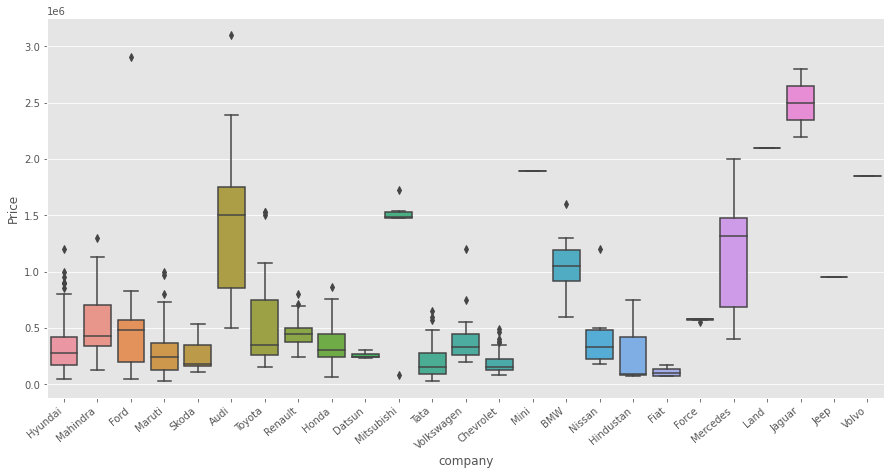

In [69]:
import seaborn as sns
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()
#plt.xticks(rotation=90)

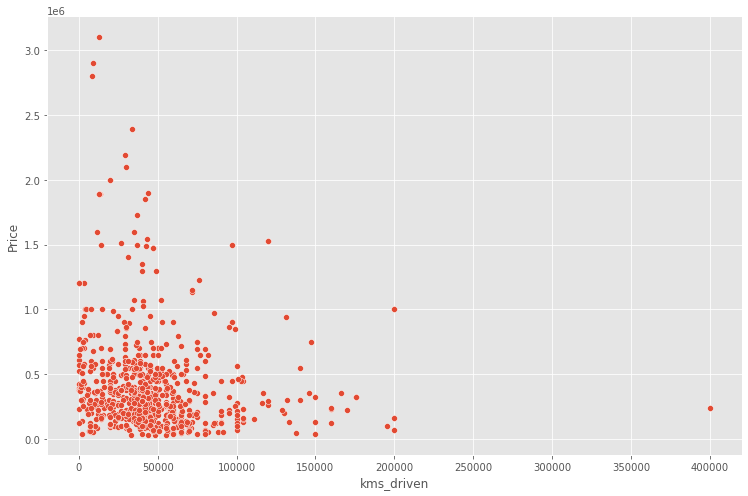

In [70]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

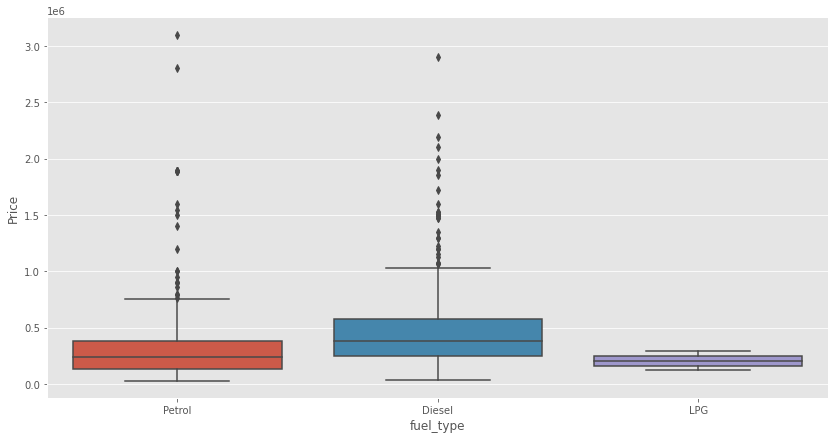

In [71]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

In [72]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [74]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [75]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
811    270000
812    110000
813    300000
814    260000
815    390000
Name: Price, Length: 815, dtype: int32

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [79]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [80]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [81]:
lr=LinearRegression()

In [82]:
pipe=make_pipeline(column_trans,lr)

In [83]:
# Fitting the  model
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [84]:
y_pred=pipe.predict(X_test)

In [85]:
r2_score(y_test,y_pred)
#check r2_

0.5460171215922738

In [86]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [87]:
np.argmax(scores)

655

In [88]:
scores[np.argmax(scores)]

0.920086890464658

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.920086890464658

In [90]:
import pickle

In [91]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [92]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([416106.73317727])

In [93]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese